In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Needed Libraries

In [ ]:
#import the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
import seaborn as sns
import random
import zipfile
import pathlib


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import datetime
from tensorflow.keras.applications import EfficientNetB0, ResNet50V2
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix

# Explore and Visualize Data to Gain Insights

In [ ]:
def view_random_image(target_dir,target_class):
  #setup target directory
  target_folder = target_dir+"/"+target_class
  # print(target_folder)
  #get the random image from the target dir and targetclass
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image[0])

  #read the image and plot
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape:{img.shape}')

  return img

Apple (389).jpeg
Image shape:(184, 274, 3)


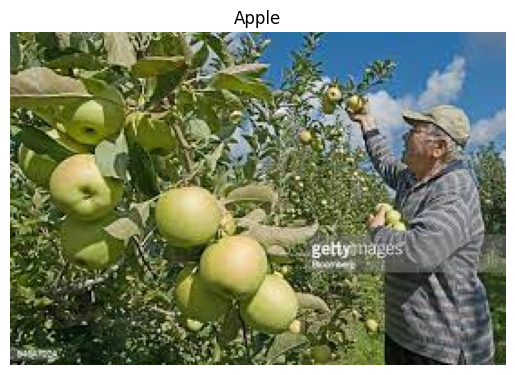

In [ ]:
img =view_random_image(target_dir="/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/train",target_class='Apple') #8er el path

# Model Implementation

**Loading and Preprocessing Training and Validation Data**

In [ ]:
Image_shape=(224,224)
Batch_size=32

train_dir='/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/train/'
val_dir='/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/valid/'

train_data_gen = ImageDataGenerator(rescale=1/255)
val_data_gen = ImageDataGenerator(rescale=1/255)

train_data = train_data_gen.flow_from_directory(train_dir,target_size=Image_shape,
                                                        batch_size=Batch_size,
                                                        class_mode='categorical')

valid_data = val_data_gen.flow_from_directory(val_dir,
                                              target_size=Image_shape,
                                              batch_size=Batch_size,
                                              class_mode='categorical')

Found 9737 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir=dir_name+'/'+experiment_name+'/'+datetime.datetime.now().strftime('%Y%m%d-%H')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'saving tensorboardcallback:{log_dir}')
  return tensorboard_callback

**Training a ResNet50V2 Model with Transfer Learning**

In [ ]:
base_model = ResNet50V2(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)# resnet model does not have the the normalized layers
x = base_model(inputs)

print(f'Shape after base_model:{x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='gloabl_average2D')(x)
print(f'Global average 2D pooling shape:{x.shape}')

# x = Dense(128,activation='relu')(x)

outputs = tf.keras.layers.Dense(5,activation='softmax',name='output_layer')(x)

model_0=tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_transferlearning_0= model_0.fit(train_data,
                                        epochs=10,
                                        steps_per_epoch=len(train_data),
                                        validation_data=valid_data,
                                        validation_steps=int(0.25*len(valid_data)),
                                        callbacks=[create_tensorboard_callback("transfer_learning",'transfer_learning_featureextraction')])

94668760/94668760 [==============================] - 1s 0us/step
Shape after base_model:(None, 7, 7, 2048)
Global average 2D pooling shape:(None, 2048)
saving tensorboardcallback:transfer_learning/transfer_learning_featureextraction/20240503-02
Epoch 1/10
305/305 [==============================] - 2699s 9s/step - loss: 0.5827 - accuracy: 0.7883 - val_loss: 0.4171 - val_accuracy: 0.8750
Epoch 2/10
305/305 [==============================] - 1737s 6s/step - loss: 0.3614 - accuracy: 0.8759 - val_loss: 0.2807 - val_accuracy: 0.8438
Epoch 3/10
305/305 [==============================] - 1749s 6s/step - loss: 0.3072 - accuracy: 0.8961 - val_loss: 0.1375 - val_accuracy: 0.9375
Epoch 4/10
305/305 [==============================] - 1716s 6s/step - loss: 0.2622 - accuracy: 0.9117 - val_loss: 0.2992 - val_accuracy: 0.8438
Epoch 5/10
305/305 [==============================] - 1694s 6s/step - loss: 0.2375 - accuracy: 0.9187 - val_loss: 0.5890 - val_accuracy: 0.7500
Epoch 6/10
305/305 [===============

In [ ]:
base_model = ResNet50V2(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)

print(f'Shape after base_model:{x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='gloabl_average2D')(x)
print(f'Global average 2D pooling shape:{x.shape}')

# x = Dense(128,activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)


outputs = tf.keras.layers.Dense(5,activation='softmax',name='output_layer')(x)

model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_transferlearning_1= model_1.fit(train_data,
                                        epochs=10,
                                        steps_per_epoch=len(train_data),
                                        validation_data=valid_data,
                                        validation_steps=int(0.25*len(valid_data)),
                                        callbacks=[create_tensorboard_callback("transfer_learning",'transfer_learning_featureextraction2')])

Shape after base_model:(None, 7, 7, 2048)
Global average 2D pooling shape:(None, 2048)
saving tensorboardcallback:transfer_learning/transfer_learning_featureextraction2/20230415-03
Epoch 1/10
304/304 [==============================] - 35s 103ms/step - loss: 0.6363 - accuracy: 0.7671 - val_loss: 0.5726 - val_accuracy: 0.8438
Epoch 2/10
304/304 [==============================] - 29s 96ms/step - loss: 0.4223 - accuracy: 0.8490 - val_loss: 0.3931 - val_accuracy: 0.9062
Epoch 3/10
304/304 [==============================] - 30s 99ms/step - loss: 0.3700 - accuracy: 0.8708 - val_loss: 0.6045 - val_accuracy: 0.7812
Epoch 4/10
304/304 [==============================] - 29s 96ms/step - loss: 0.3387 - accuracy: 0.8802 - val_loss: 0.3122 - val_accuracy: 0.9062
Epoch 5/10
304/304 [==============================] - 31s 101ms/step - loss: 0.3209 - accuracy: 0.8830 - val_loss: 0.2552 - val_accuracy: 0.8750
Epoch 6/10
304/304 [==============================] - 30s 99ms/step - loss: 0.3042 - accuracy: 0.

# Model Evaluation

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs= range(len(history.history['loss']))

  #plotloss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #plotaccuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

In [ ]:
# find indices of train_data
train_data.class_indices

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
1/1 [==============================] - 0s 31ms/step
[[3.1698530e-03 8.2268240e-04 9.3400369e-05 9.9590731e-01 6.7473875e-06]]
3


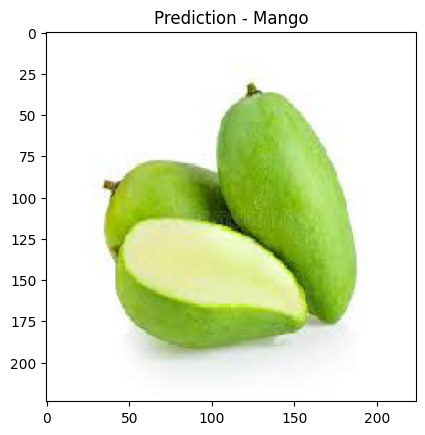

In [ ]:

category = {
    0:'Apple',
    1:'Banana',
    2:'Grape',
    3:'Mango',
    4:'Strawberry'
}

img_=image.load_img('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/valid/Mango/Mango (1306).jpeg',target_size=(224,224))
img_array = image.img_to_array(img_)
print(img_array)
img_processed = np.expand_dims(img_array,axis=0)
img_processed /= 255

prediction = model_0.predict(img_processed)
print(prediction)
index = np.argmax(prediction)
print(index)
plt.title("Prediction - {}".format(category[index]))
plt.imshow(img_array)




[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
1/1 [==============================] - 0s 102ms/step
[[9.2564933e-06 9.9994648e-01 6.4698929e-06 3.5236182e-05 2.5335739e-06]]
1


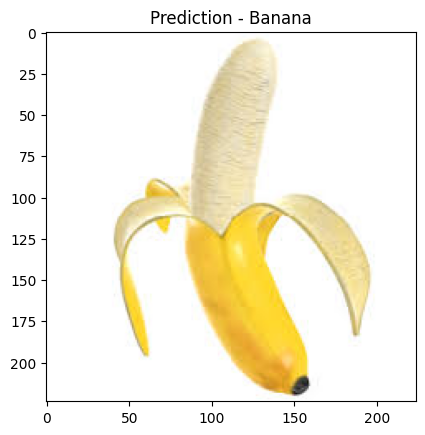

In [ ]:
img_=image.load_img('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/valid/Banana/Banana (2955).jpeg',target_size=(224,224))
img_array = image.img_to_array(img_)
print(img_array)
img_processed = np.expand_dims(img_array,axis=0)
img_processed /= 255

prediction = model_0.predict(img_processed)
print(prediction)
index = np.argmax(prediction)
print(index)
plt.title("Prediction - {}".format(category[index]))
plt.imshow(img_array)

[[[186. 182. 179.]
  [120. 116. 113.]
  [181. 177. 174.]
  ...
  [ 72.  99. 110.]
  [ 79. 111. 126.]
  [ 79. 111. 126.]]

 [[188. 184. 181.]
  [151. 147. 144.]
  [178. 174. 171.]
  ...
  [ 71.  98. 109.]
  [ 75. 107. 122.]
  [ 75. 107. 122.]]

 [[195. 191. 188.]
  [123. 119. 116.]
  [169. 165. 162.]
  ...
  [ 69.  96. 107.]
  [ 73. 102. 116.]
  [ 73. 102. 116.]]

 ...

 [[102.  83.  87.]
  [ 99.  83.  86.]
  [ 91.  75.  76.]
  ...
  [145. 111.  48.]
  [145. 116.  58.]
  [160. 131.  73.]]

 [[103.  84.  88.]
  [ 99.  83.  86.]
  [ 92.  76.  77.]
  ...
  [140. 105.  39.]
  [106.  78.  13.]
  [ 97.  69.   4.]]

 [[104.  85.  89.]
  [100.  84.  87.]
  [ 93.  77.  78.]
  ...
  [130.  93.  25.]
  [ 92.  64.   0.]
  [ 95.  67.   2.]]]
1/1 [==============================] - 0s 41ms/step
[[2.6669754e-03 9.9500388e-01 1.6985832e-04 2.1517163e-03 7.4165532e-06]]
1


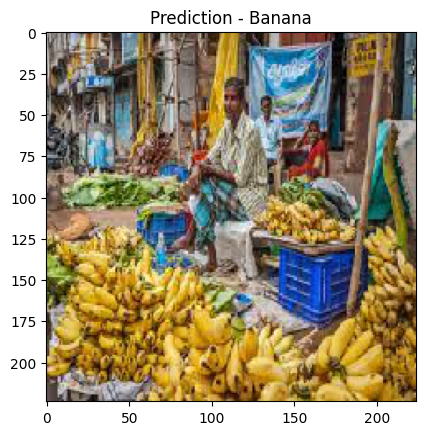

In [ ]:
img_=image.load_img('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test/Banana/Banana (3652).jpeg',target_size=(224,224))
img_array = image.img_to_array(img_)
print(img_array)
img_processed = np.expand_dims(img_array,axis=0)
img_processed /= 255

prediction = model_0.predict(img_processed)
print(prediction)
index = np.argmax(prediction)
print(index)
plt.title("Prediction - {}".format(category[index]))
plt.imshow(img_array)

[[[148. 165. 157.]
  [148. 165. 157.]
  [ 59.  76.  68.]
  ...
  [174. 185. 153.]
  [178. 189. 155.]
  [178. 189. 155.]]

 [[148. 165. 157.]
  [148. 165. 157.]
  [ 59.  76.  68.]
  ...
  [174. 185. 153.]
  [178. 189. 155.]
  [178. 189. 155.]]

 [[148. 165. 157.]
  [148. 165. 157.]
  [ 59.  76.  68.]
  ...
  [174. 185. 153.]
  [178. 189. 155.]
  [178. 189. 155.]]

 ...

 [[234. 250. 237.]
  [234. 250. 237.]
  [151. 167. 154.]
  ...
  [185. 205. 144.]
  [184. 204. 143.]
  [184. 204. 143.]]

 [[234. 250. 237.]
  [234. 250. 237.]
  [151. 167. 154.]
  ...
  [185. 205. 144.]
  [184. 204. 143.]
  [184. 204. 143.]]

 [[234. 250. 237.]
  [234. 250. 237.]
  [151. 167. 154.]
  ...
  [185. 205. 144.]
  [184. 204. 143.]
  [184. 204. 143.]]]
1/1 [==============================] - 0s 73ms/step
[[6.8825036e-02 2.7303788e-04 1.6186105e-03 9.2917120e-01 1.1213555e-04]]
3


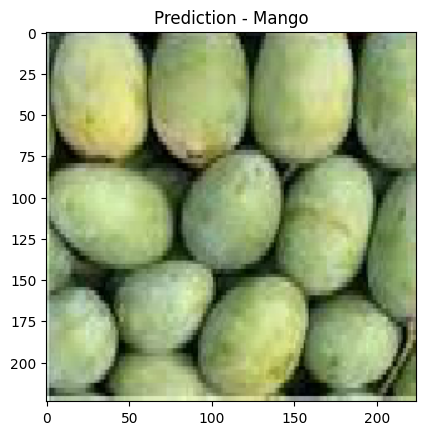

In [ ]:
img_=image.load_img('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test/Mango/Mango (1862).jpeg',target_size=(224,224))
img_array = image.img_to_array(img_)
print(img_array)
img_processed = np.expand_dims(img_array,axis=0)
img_processed /= 255

prediction = model_0.predict(img_processed)
print(prediction)
index = np.argmax(prediction)
print(index)
plt.title("Prediction - {}".format(category[index]))
plt.imshow(img_array)

In [ ]:
len(os.listdir('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test/Banana/'))

20

In [ ]:
filedir = '/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test/Banana'

In [ ]:
filedir.split('/')[-1]

'Banana'

**Predicting and Evaluating Model Accuracy**

In [ ]:
def predict_dir(filedir,model):
  cols=3
  pos=0
  images=[]
  total_images=len(os.listdir(filedir))
  rows=(total_images//cols+1)
  true = filedir.split('/')[-1]

  for i in sorted(os.listdir(filedir)):
    images.append(os.path.join(filedir,i))

  for subplot,imgg in enumerate(images):
    img_ = image.load_img(imgg,target_size=(224,224))
    img_array = image.img_to_array(img_)

    img_processed = np.expand_dims(img_array,axis=0)
    img_processed /= 255

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    pred = category.get(index)
    if pred==true:
      pos+=1
  accu = pos/total_images
  print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(accu,pos=pos,total=total_images,orignal=true))

In [ ]:
for i in os.listdir('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test'):
  # print(i)
  predict_dir(os.path.join('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test',i),model_0)

1/1 [==============================] - 0s 40ms/step
Accuracy for Banana: 0.90 (18/20)
1/1 [==============================] - 0s 26ms/step
Accuracy for Grape: 1.00 (20/20)
1/1 [==============================] - 0s 25ms/step
Accuracy for Apple: 0.80 (16/20)
1/1 [==============================] - 0s 26ms/step
Accuracy for Strawberry: 0.85 (17/20)
1/1 [==============================] - 0s 24ms/step
Accuracy for Mango: 0.80 (16/20)


**Generating and Visualizing Confusion Matrix**

In [ ]:
def labels_confusion_matix(folder):
  mapping ={}
  for i,j in enumerate(sorted(os.listdir(folder))):
    # print(i)
    # print(j)

    mapping[j]=i
  files=[]
  real=[]
  predicted=[]

  for i in os.listdir(folder):
    true = os.path.join(folder,i)
    true = true.split('/')[-1]
    # print(true)
    true = (mapping[true])

    for j in os.listdir(os.path.join(folder,i)):
      img_ = image.load_img(os.path.join(folder,i,j), target_size=(224,224))
      img_array = image.img_to_array(img_)

      img_processed = np.expand_dims(img_array,axis=0)
      img_processed /=255

      prediction = model_0.predict(img_processed)

      index = np.argmax(prediction)

      predicted.append(index)
      real.append(true)
  return real,predicted

In [ ]:
def print_confusion_matrix(real,predicted):
  total_output_labels=5
  cmap='turbo'

  cm_plot_labels=[i for i in range(5)]

  cm = confusion_matrix(y_true=real,y_pred=predicted)

  df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)

  sns.set(font_scale=1.2)

  plt.figure(figsize=(15,10))

  s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap)

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('confusion_matrix.png')
  plt.show()

In [ ]:
y_true,y_pred=labels_confusion_matix('t')
print_confusion_matrix(y_true,y_pred)

1/1 [==============================] - 0s 26ms/step


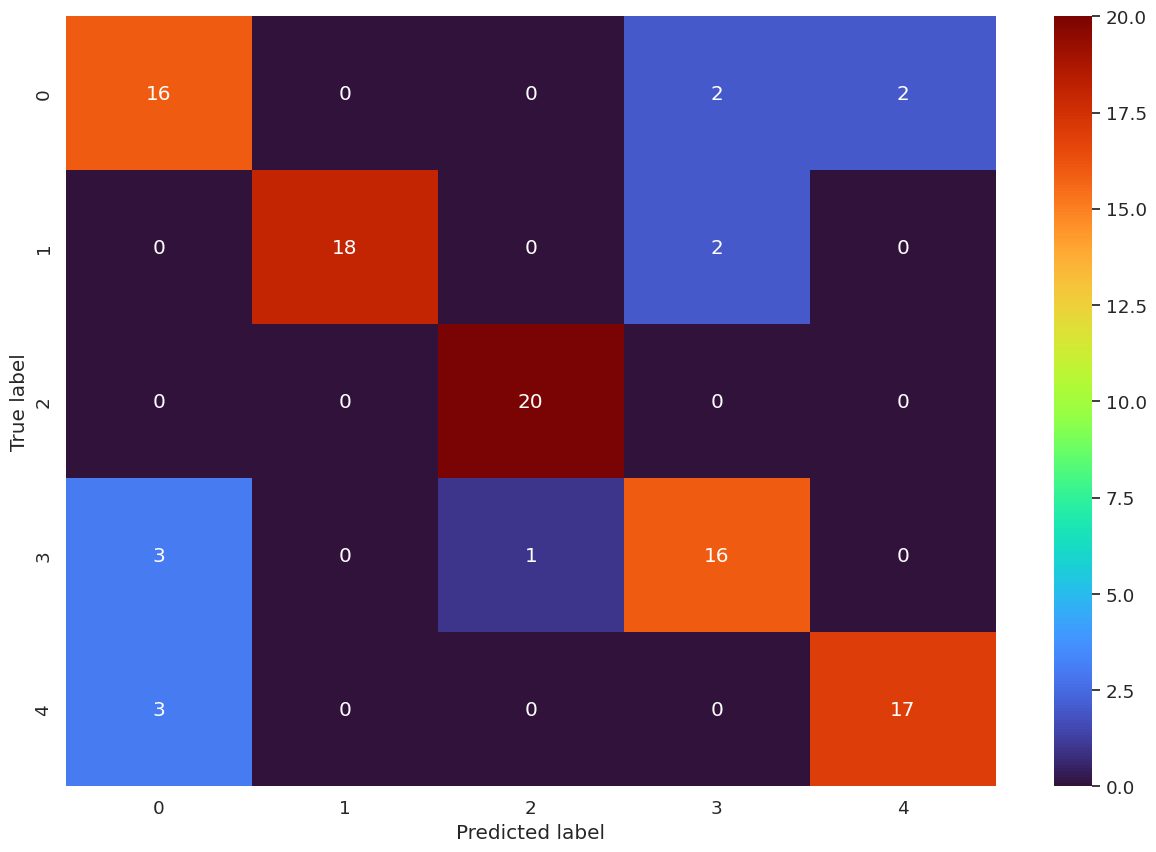

In [ ]:
y_true,y_pred=labels_confusion_matix('/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test')
print_confusion_matrix(y_true,y_pred)